In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
from matplotlib import rcParams
from cycler import cycler

# -- Figure size --
rcParams['figure.figsize'] = (12, 4)
# -- Saving Options --
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 500
rcParams['savefig.transparent'] = True
# -- Plot Styles --
rcParams['lines.linewidth'] = 0.3
teal = (106 / 256, 197 / 256, 179 / 256)
navy = (56 / 256, 74 / 256, 143 / 256)
pink = [199 / 255, 99 / 255, 150 / 255]
rcParams['axes.prop_cycle'] = cycler(color=[teal, navy, pink])

In [296]:
from tqdm.notebook import tqdm

In [118]:
import nltk

In [297]:
df = pd.read_csv('subtaskA_train.csv').drop(columns=['Id'])

In [298]:
df.head()

,comment_text,conspiratorial
0,⚡Se non ci fossero soldati non ci sarebbero gu...,0
1,"21/08/21]( [PRE-PRINT]\n\n📄__ ""Shedding of Inf...",1
2,PAURA E DELIRIO ALLA CNN: IL MINISTERO DELLA V...,1
3,L'Aspirina non aumenta la sopravvivenza dei pa...,0
4,L'Italia non puo' dare armi lo vieta la Costit...,0


In [299]:
df.shape

(1842, 2)

In [300]:
found=0
for e in list(df.columns):
    if df[e].isna().any():
        found+=1
        print(e, df[e].isna().sum())
if found==0:
  print('No NaN values found')


No NaN values found


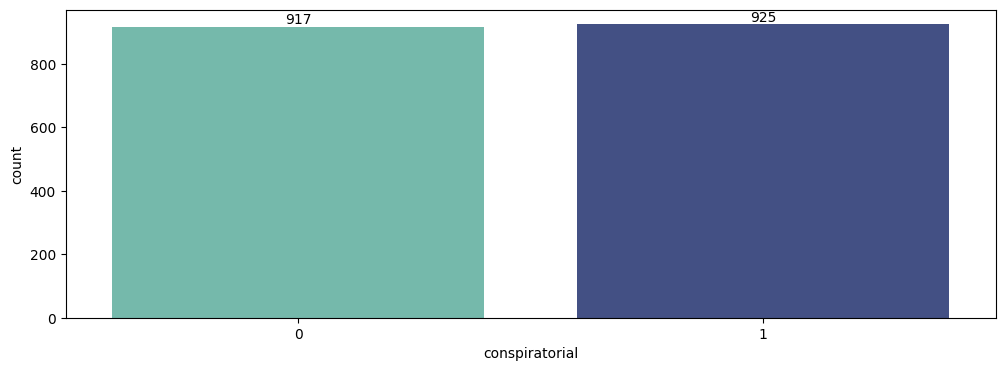

In [301]:
ax = sns.countplot(data=df, x='conspiratorial')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

## NLTK preprocessing

### distribuzione parole

In [249]:
import re
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [250]:
punteggiatura = ['.', ',', ':', ';', '?', '!', '--', '-', '(', ')', '``', "''", '#', '$', '[', ']', '``', '_', "''", '*', '...']

In [321]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('italian'))

def clean_text(text, lower=False):
    """ text: a string
        return: modified initial string """
    if lower:
      text = text.lower() # lowercase text
    text = re.sub(r'[/(){}\[\]\|@,;]', ' ', text) # substitute the matched string with space.
    text = re.sub(r'[#+_]', '', text) # substitute bad symbols with nothing.
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

#df['comment_text'] = df['comment_text'].apply(clean_text)

In [322]:
df.head(10)

,comment_text,conspiratorial
0,⚡Se non ci fossero soldati non ci sarebbero gu...,0
1,"21/08/21]( [PRE-PRINT]\n\n📄__ ""Shedding of Inf...",1
2,PAURA E DELIRIO ALLA CNN: IL MINISTERO DELLA V...,1
3,L'Aspirina non aumenta la sopravvivenza dei pa...,0
4,L'Italia non puo' dare armi lo vieta la Costit...,0
5,Ma non siete stufi di essere presi in giro??,1
6,**Ritengo questo audio piuttosto importante**:...,1
7,‼️ DIFFERENZA TRA SANGUE VACCINATO E NON VACCI...,1
8,Panzana pazzesca del leghista Siri: le misure ...,1
9,Tesla voleva portare a tutti energia gratuita ...,0


In [323]:
tokens = list()

for row in df.comment_text:
    tokens_sent = nltk.word_tokenize(row)
    for token in tokens_sent:
      if not token.isnumeric() and token not in punteggiatura:
        tokens.append(token)

    #tokens += tokens_sent

print('tokens:', len(tokens),
      '\nvocabulary:', len(set(tokens)),
      '\nTTR:', len(set(tokens))/len(tokens))

tokens: 92233 
vocabulary: 17683 
TTR: 0.19172096754957554


In [324]:
tokens[:50]

['⚡Se',
 'non',
 'ci',
 'fossero',
 'soldati',
 'non',
 'ci',
 'sarebbero',
 'guerre',
 '21/08/21',
 'PRE-PRINT',
 '📄__',
 'Shedding',
 'of',
 'Infectious',
 'SARS-CoV-2',
 'Despite',
 'Vaccination',
 '🇮🇹',
 'Diffusione',
 'del',
 'SARS-CoV-2',
 'nonostante',
 'la',
 'vaccinazione',
 '__',
 '📊',
 'La',
 'variante',
 'Delta',
 'del',
 'SARS-CoV-2',
 'può',
 'causare',
 'elevate',
 'cariche',
 'virali',
 'è',
 'al',
 'trasmissibile',
 'e',
 'contiene',
 'mutazioni',
 'che',
 'conferiscono',
 'una',
 'fuga',
 'immunitaria',
 'parziale',
 'le']

In [325]:
words, freqs = np.unique(tokens, return_counts=True)[0], np.unique(tokens, return_counts=True)[1]

sorted_freqs = sorted(zip(freqs, words), reverse=True)
sorted_frequencies, sorted_words = zip(*sorted_freqs)

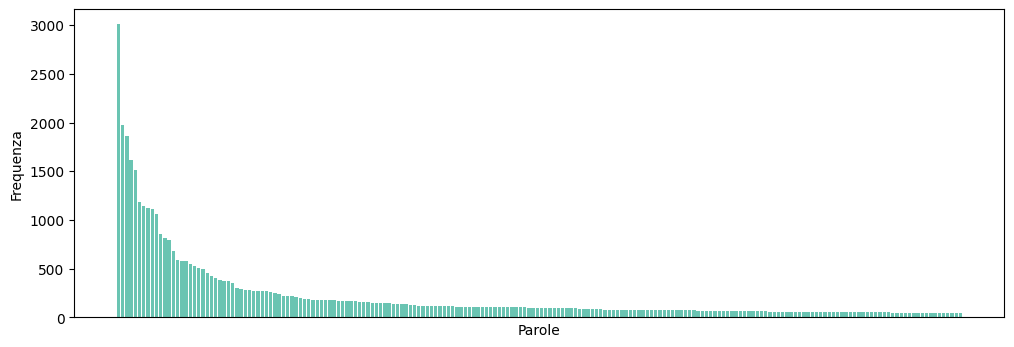

In [326]:
plt.bar(sorted_words[:200], sorted_frequencies[:200])
plt.xlabel('Parole')
plt.ylabel('Frequenza')

plt.xticks([])

#plt.savefig('zipf.pdf', dpi=300, bbox_inches='tight')
plt.show()

### distribuzione POS

In [327]:
#punteggiatura = ('.', ',', ':', ';', '?', '!', '--', '-', '(', ')', '``', "''", '#', '$')
aggettivi = ('JJ', 'JJR', 'JJS')
sostantivi = ('NN', 'NNS', 'NNP', 'NNPS')
verbi = ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'MD')
avverbi = ('RB', 'RBR', 'RBS', 'WRB')
articoli = ('DT',)
preposizioni = ('IN', 'RP')
congiunzioni = ('CC', 'IN')
pronomi = ('PRP', 'PRPS', 'WP', 'WPS')

In [328]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
tok_pos = nltk.pos_tag(tokens) #(token, POS)

pos = list() #pos only
for tok, p in tok_pos:
    if p not in punteggiatura:
        pos.append(p)


In [330]:
pos_count= list()
for p, count in zip(np.unique(pos, return_counts=True)[0], np.unique(pos, return_counts=True)[1]):
    pos_count.append((count,p))

sorted(pos_count, reverse=True)[:10]

[(52270, 'NN'),
 (15906, 'NNP'),
 (8101, 'JJ'),
 (3762, 'FW'),
 (3292, 'IN'),
 (2066, 'VBP'),
 (1713, 'VBZ'),
 (1275, 'DT'),
 (907, 'RB'),
 (703, 'VBD')]

In [310]:
def mergePOS(pos_lst, pos_counts, pos_dict, pos_key):
    for count, pos in pos_counts:
        if pos in pos_lst:
            pos_dict[pos_key]= pos_dict.get(pos_key) + count

In [311]:
pos_grouped = {
    'aggettivi':0,
    'sostantivi':0,
    'verbi':0,
    'avverbi':0,
    'articoli':0,
    'preposizioni':0,
    'congiunzioni':0
}

mergePOS(aggettivi, pos_count, pos_grouped, 'aggettivi')
mergePOS(sostantivi, pos_count, pos_grouped, 'sostantivi')
mergePOS(verbi, pos_count, pos_grouped, 'avverbi')
mergePOS(avverbi, pos_count, pos_grouped, 'verbi')
mergePOS(articoli, pos_count, pos_grouped, 'articoli')
mergePOS(preposizioni, pos_count, pos_grouped, 'preposizioni')
mergePOS(congiunzioni, pos_count, pos_grouped, 'congiunzioni')

In [312]:
pos_grouped

{'aggettivi': 8111,
 'sostantivi': 68741,
 'verbi': 923,
 'avverbi': 4959,
 'articoli': 1275,
 'preposizioni': 3307,
 'congiunzioni': 3394}

In [313]:
sorted_pos = {k: v for k, v in sorted(pos_grouped.items(), key=lambda item: item[1], reverse=True)}

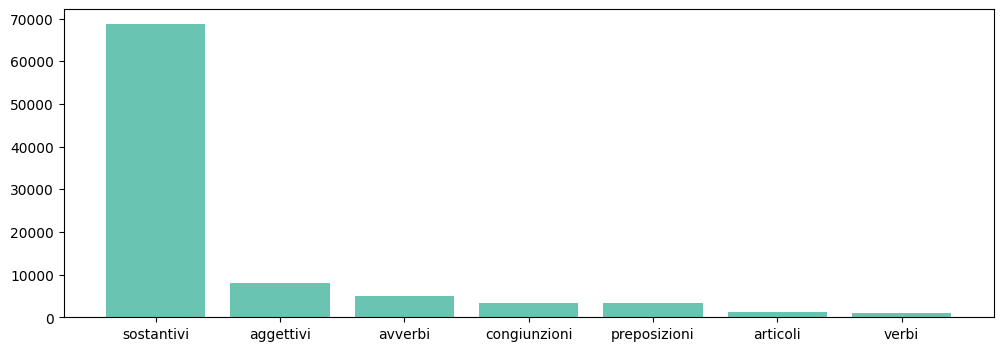

In [314]:
plt.bar(sorted_pos.keys(), sorted_pos.values())

#plt.xticks(rotation=45)
plt.show()

In [315]:
pos_grouped['verbi']/pos_grouped['sostantivi']

0.013427212289608822

### NE

In [316]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [317]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [318]:
def extract_NE(tok_pos, NE):
  NEs = list()
  freq_NEs = list()

  # si ottiene l'albero, quindi si controlla che ci siano nodi intermedi etichettati
  # con una data NE
  ent_nom = nltk.ne_chunk(tok_pos)
  for nodo in ent_nom:
      name_ent = ''
      if hasattr(nodo, 'label'):
          if nodo.label() == NE:
              for figlio in nodo.leaves():
                  # si prende il primo elemento di ogni foglia, corrispondente al token,
                  # quindi si aggiunge la stringa ad una lista
                  name_ent += ' ' + figlio[0]
              NEs.append(name_ent)

  for ne in list(set(NEs)):
      freq = NEs.count(ne)
      freq_NEs.append((freq, ne))
  freq_NEs = sorted(freq_NEs, reverse=True)

  return freq_NEs

In [331]:
freq_persone = extract_NE(tok_pos, 'PERSON')

In [333]:
freq_persone[:15]

[(81, ' Non'),
 (42, ' Trump'),
 (40, ' Questo'),
 (32, ' Putin'),
 (28, ' Questa'),
 (28, ' Per'),
 (26, ' Sono'),
 (26, ' Delta'),
 (24, ' Draghi'),
 (21, ' Stati Uniti'),
 (21, ' Perché'),
 (19, ' Covid'),
 (16, ' Stato'),
 (15, ' Paesi'),
 (15, ' Abbiamo')]

In [428]:
STOPWORDS = set(stopwords.words('italian'))
' Questo'.split()[0].lower() in STOPWORDS

True

In [443]:
persone_dict = dict()
threshold = 1
threshold_token = 3

for count, token in freq_persone:
  if count >= threshold and len(token.split()[0]) > threshold_token and token.split()[0].lower() not in STOPWORDS:
    persone_dict[token] = count

In [412]:
freq_gpe = extract_NE(tok_pos, 'GPE')


In [413]:
freq_gpe[:15]

[(97, ' Russia'),
 (86, ' Italia'),
 (50, ' Ucraina'),
 (21, ' Europa'),
 (15, ' Cina'),
 (14, ' Paese'),
 (11, ' Taiwan'),
 (11, ' Israele'),
 (11, ' Germania'),
 (10, ' New York'),
 (10, ' Chi'),
 (9, ' Roma'),
 (9, ' America'),
 (7, ' Polonia'),
 (7, ' India')]

In [444]:
gpe_dict = dict()
threshold = 1
threshold_token = 2

for count, token in freq_gpe:
  if count >= threshold and len(token.split()[0]) > threshold_token and token.split()[0].lower() not in STOPWORDS:
    gpe_dict[token] = count

## wordcloud

In [431]:
from wordcloud import WordCloud, ImageColorGenerator

In [436]:
persone_merged = list()
for token in list(persone_dict.keys()): #list(df[df['conspiratorial'] == 1].comment_text):
  freq = persone_dict[token]
  token += ' '
  token = (token * freq)# * persone_dict[token])
  persone_merged += (token.split())

In [437]:
import random

text = ''
random.shuffle(persone_merged)
for token in persone_merged:
  text += token + ' '
text

"Mosca Engelbrecht Gregg Bibbia Vogliono Fetterman Musk Phillips Institute Romagna Columbia Clinton Costoro Ho Edificio Conte Senza Bassi Paesi Wave Matteo Dopo Paciolla Gates Sfuggito Finora Saper Arena __Un Pensiamo Bergamo Roberto Siete Uniti Europa Meno Deep Zelensky Bailey Di Johnson Lorenzin Uscito Cosentino Domandati Salvini Lega Clinton Reich Delta Systems Putin Uniti Covid Ritardati Paolo Biden Baker Zelensky Ebbene Andrea Uniti Sara Bilderberg La Davos Stramezzi Per Devo Phillips Gruppo Musk Reich La Paesi Unite Bill Tuttavia Deep Great Francia Casa Uniti Quotidiano Milani Popolare Grillo Donald Airbus Behanzin Italia Bank Sergei Letta Bilderberg Iscriviti Informazione Ormai Gloria Trump Elon Sono Stati Bilancio Verna Trump Putin Organization Libertà Ronzulli Sudden Hunter Trump Yuri Azov Reset Poroshenko Zanotelli II Lira Si Paesi Silver Tipo Malone Durham Cosa Biscardi Stato George Vaccini Lysychansk Dopo Berlusca Trump Vescovi Regno Putin Safire Vedrete Macron Gonzalo Corp

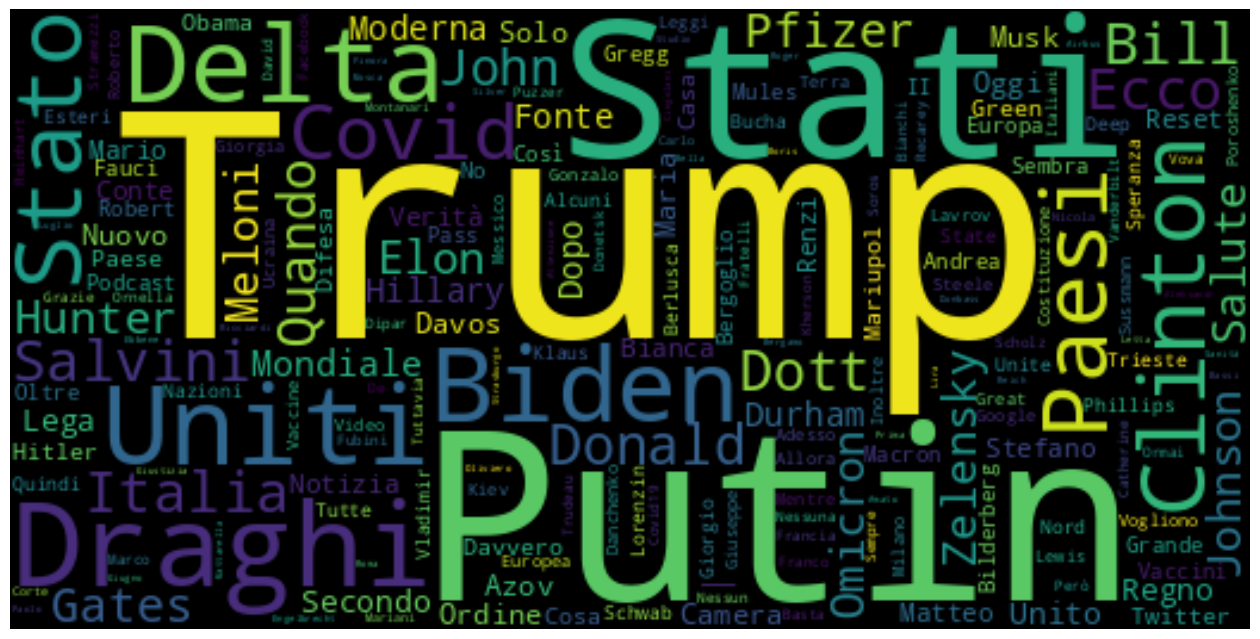

In [438]:
conspiratorial_msg_cloud = WordCloud(width=520,
                                     height=260,
                                     stopwords=STOPWORDS,
                                     #max_font_size=50,
                                     #background_color = "black", colormap = 'Pastel1'
                                     ).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(conspiratorial_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

In [439]:
gpe_merged = list()
for token in list(gpe_dict.keys()): #list(df[df['conspiratorial'] == 1].comment_text):
  freq = gpe_dict[token]
  token += ' '
  token = (token * freq)# * persone_dict[token])
  gpe_merged += (token.split())

In [440]:
text = ''
random.shuffle(gpe_merged)
for token in gpe_merged:
  text += token + ' '
text

'Washington Italia Russo Davos Lombardia Ucraina Romania Calabria British Russia Roma Russia Europa Paese Italia Newsmax Palermo Ucraina Draghi Francia Russia India Cina Ricorda Russia Australia Italia Sparta Europa Italia Russia Auspicano Italia Paese Russia York Pfizer Russia Russia Ucraina Chiunque Germania Lituania Europa Georgia Medicine Italia India Ucraina Europa Scemo Quebec Russia Florida Inghilterra Natalia Pennsylvania Russia New Europa Ucraina Porca Svizzera Medicina Minnesota Russia Cisgiordania Italia Russia New Russia Italia Russia Australia Europa Italia Italia Russia Taiwan Argentina Campania Florida Massoneria Ucraina Calabria Nord Fratelli Canada Beirut Russia Mosse Russia Mosca SORDINA Ucraina Russia Ungheria Italia Ucraina Italia Italia Russia India Iceland__ Paese Roma Russia Tuttavia Florida Davos Germania Catania America Cina Australia Roma Serbia Paesi Midland Canada Italia Green Russia Italia Russia Italia Russia Hong Russia Cina South Germania Russia Italia C

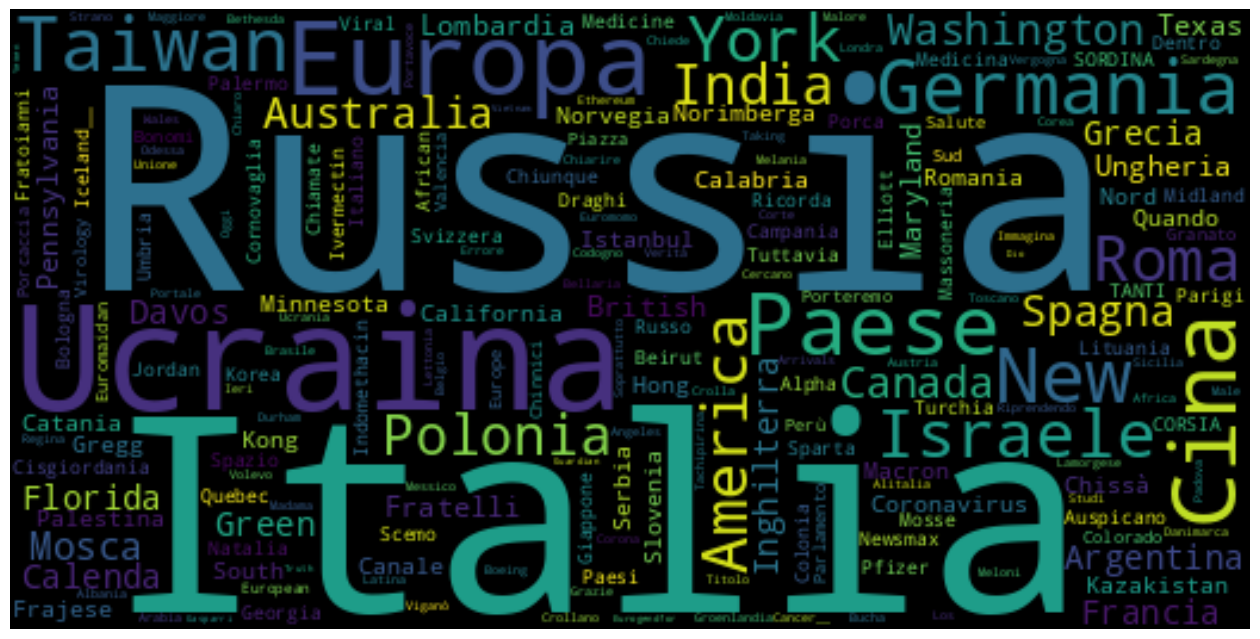

In [441]:
conspiratorial_msg_cloud = WordCloud(width=520,
                                     height=260,
                                     stopwords=STOPWORDS,
                                     #max_font_size=50,
                                     #background_color = "black", colormap = 'Pastel1'
                                     ).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(conspiratorial_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

## Sentiment analysis

In [144]:
!pip uninstall vaderSentiment
!pip install vader-multi

VADER è un lexicon pensato solo per l'inglese

vader-multi effettua una traduzione della frase in inglese tramite Google Translate API e puoi effettua la SA tramite la libreria "Vader" in inglese.

In [145]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("VADER is smart, handsome, and funny.")

{'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}

In [41]:
analyzer.polarity_scores("VADER è MOLTO INTELLIGENTE, bello e DIVERTENTE!!!")

{'neg': 0.0, 'neu': 0.224, 'pos': 0.776, 'compound': 0.9417}

In [44]:
print(df['comment_text'][3])
analyzer.polarity_scores(df['comment_text'][3])

L'Aspirina non aumenta la sopravvivenza dei pazienti ricoverati in ospedale per Covid-19,


{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.2411}

In [74]:
df_vader = pd.DataFrame(columns=['text', 'neg', 'neu', 'pos','compound', 'conspiratorial'])

In [76]:
for i, row in tqdm(df.iterrows(), total=len(df)):
    df_vader.loc[i, 'text'] = row['comment_text']
    df_vader.loc[i, 'conspiratorial'] = row['conspiratorial']
    try:
      score = analyzer.polarity_scores(row['comment_text'])
      for key in score.keys():
          df_vader.loc[i, key] = score[key]
    except IndexError:
      continue
    df_vader.loc[i, 'conspiratorial'] = row['conspiratorial']

df_vader.head()

  0%|          | 0/1842 [00:00<?, ?it/s]

,text,neg,neu,pos,compound,conspiratorial
0,⚡Se non ci fossero soldati non ci sarebbero gu...,0.145,0.661,0.193,0.1838,0
1,"21/08/21]( [PRE-PRINT]\n\n📄__ ""Shedding of Inf...",0.032,0.929,0.039,-0.0772,1
2,PAURA E DELIRIO ALLA CNN: IL MINISTERO DELLA V...,0.101,0.807,0.092,-0.8869,1
3,L'Aspirina non aumenta la sopravvivenza dei pa...,0.179,0.821,0.0,-0.2411,0
4,L'Italia non puo' dare armi lo vieta la Costit...,0.215,0.56,0.225,0.0274,0


In [77]:
df_vader.shape

(1842, 6)

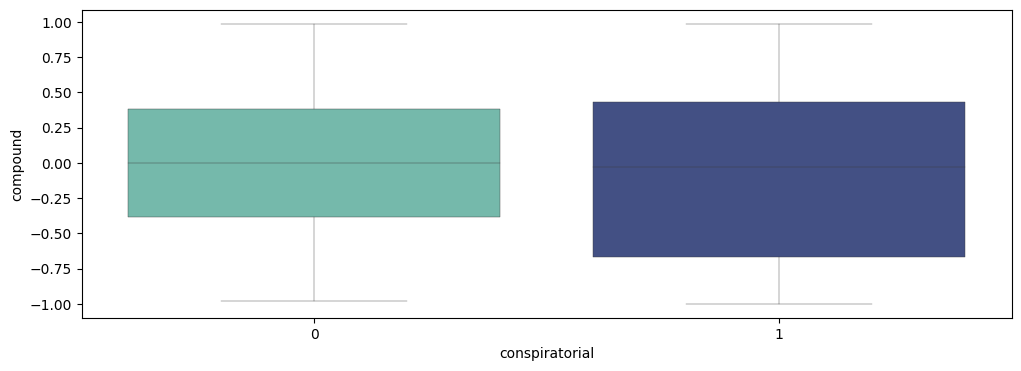

In [87]:
sns.boxplot(data=df_vader, x='conspiratorial', y='compound')
plt.show()

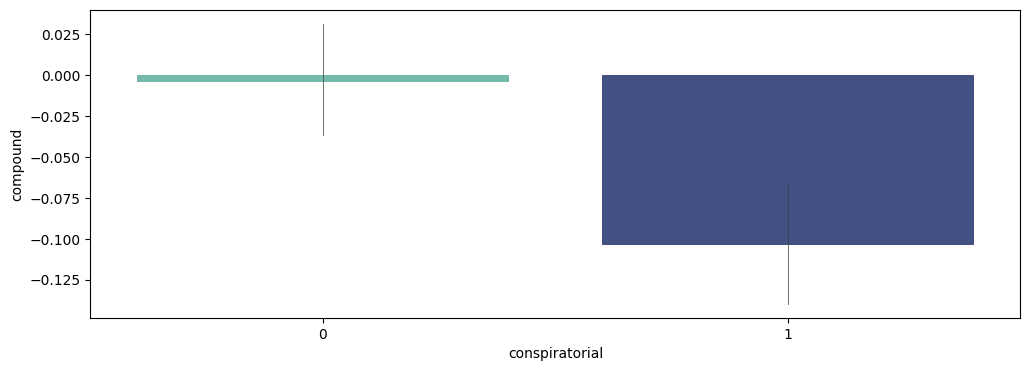

In [88]:
sns.barplot(data=df_vader, x='conspiratorial', y='compound')
plt.show()

i post cospirazionisti tendono ad avere una sentiment più negativa

In [79]:
df_vader.columns[1:4]

Index(['neg', 'neu', 'pos'], dtype='object')

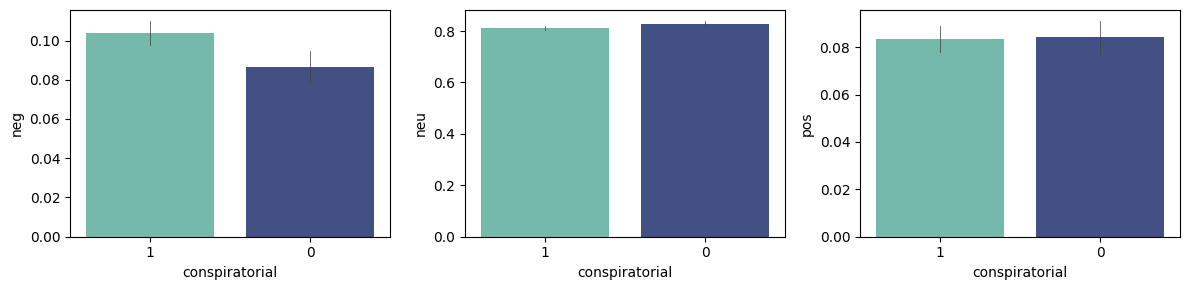

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, col in enumerate(df_vader.columns[1:4]):
    sns.barplot(data=df_vader, x='conspiratorial', y=col,
                order=list(reversed(df_vader.conspiratorial.unique())), ax=axs[i])

plt.tight_layout()

#plt.savefig('vader_barplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

notare la scala dei dati, il sentimento negativo è comunque minimo e non va mai oltre lo 0.12

In [94]:
df_vader['compound'].mean(), df_vader['compound'].std()

(-0.05408875611080936, 0.5587746794069434)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


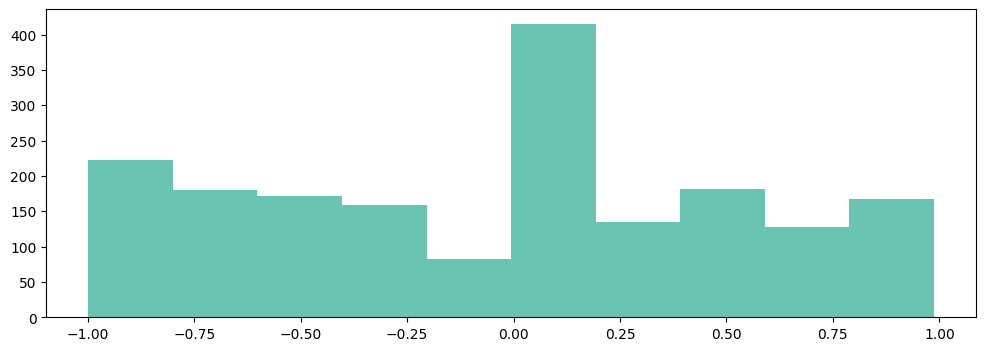

In [96]:
plt.hist(df_vader['compound'])
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


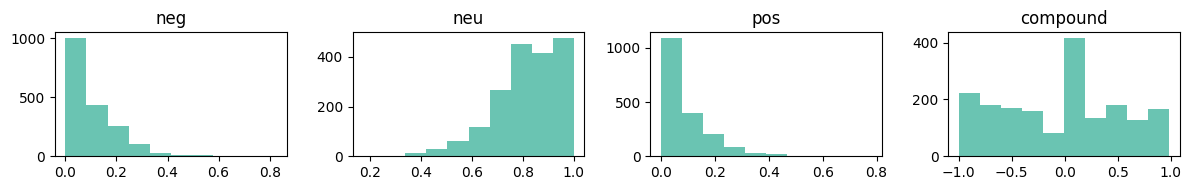

In [114]:
fig, axs = plt.subplots(1, 4, figsize=(12, 2))

for i, col in enumerate(df_vader.columns[1:5]):
  ax=axs[i]
  ax.hist(df_vader[col])
  ax.set_title(col)

plt.tight_layout()

#plt.savefig('vader_barplot.pdf', dpi=300, bbox_inches='tight')
plt.show()